In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [5]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [6]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [8]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [9]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
# checking the number of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [11]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation: positive or negative

In [13]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

In [14]:
gold_data.set_index('Date', inplace=True)

In [15]:
correlation = gold_data.corr()
print(correlation)

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


<Axes: >

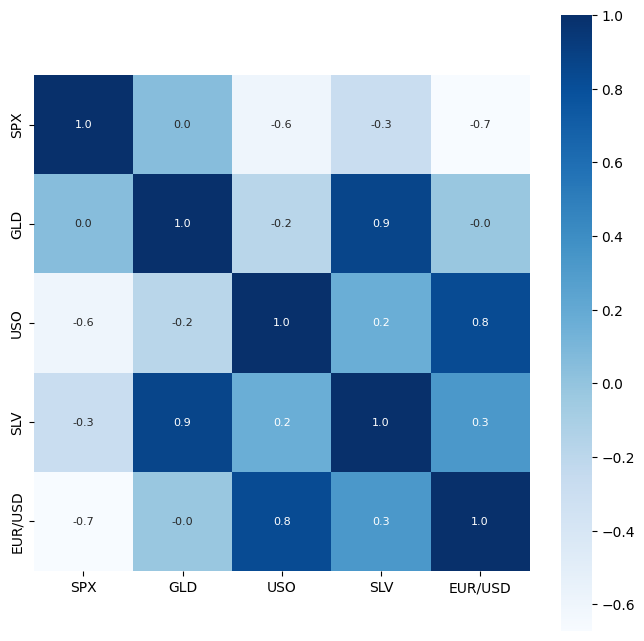

In [17]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [18]:
#correlation values of gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipython-input-1420348488.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

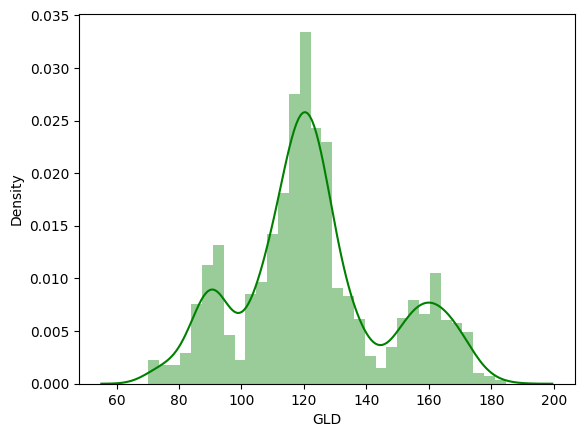

In [19]:
# check the distribution of the gold price
sns.distplot(gold_data['GLD'], color='green')

splitting the features

In [20]:
X=gold_data.drop(['GLD'],axis=1)
Y=gold_data['GLD']

In [21]:
print(X)

                    SPX        USO      SLV   EUR/USD
Date                                                 
2008-01-02  1447.160034  78.470001  15.1800  1.471692
2008-01-03  1447.160034  78.370003  15.2850  1.474491
2008-01-04  1411.630005  77.309998  15.1670  1.475492
2008-01-07  1416.180054  75.500000  15.0530  1.468299
2008-01-08  1390.189941  76.059998  15.5900  1.557099
...                 ...        ...      ...       ...
2018-05-08  2671.919922  14.060000  15.5100  1.186789
2018-05-09  2697.790039  14.370000  15.5300  1.184722
2018-05-10  2723.070068  14.410000  15.7400  1.191753
2018-05-14  2730.129883  14.380000  15.5600  1.193118
2018-05-16  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [22]:
print(Y)

Date
2008-01-02     84.860001
2008-01-03     85.570000
2008-01-04     85.129997
2008-01-07     84.769997
2008-01-08     86.779999
                 ...    
2018-05-08    124.589996
2018-05-09    124.330002
2018-05-10    125.180000
2018-05-14    124.489998
2018-05-16    122.543800
Name: GLD, Length: 2290, dtype: float64


splitting into training data  and test data

In [23]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

Model Training: Random Forest Regressor

In [24]:
regressor = RandomForestRegressor(n_estimators=100)

In [25]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [26]:
#prediction on test data
test_data_prediction =  regressor.predict(X_test)

In [27]:
print(test_data_prediction)

[168.63389927  81.87249998 115.92979966 127.60140088 120.68950135
 154.90119766 150.35449904 126.13640037 117.60709866 126.21420023
 116.55250093 171.94540069 141.58789877 167.64089811 115.12129952
 117.47170008 137.66380386 170.16410072 159.5755027  158.57299977
 155.08780019 125.1645998  175.80530008 156.67110283 125.21920016
  93.8023997   77.30170006 120.61450005 119.1790997  167.44059993
  88.12930043 125.13630016  91.31720059 117.66690035 121.08649919
 136.96970022 115.3358014  115.21280091 147.89159926 107.36700111
 104.17890248  87.18549808 126.61730037 118.18120012 153.62269928
 119.68899995 108.35129996 107.88089812  93.18530074 127.13709779
  75.20260017 113.63019921 121.48259996 111.41329902 118.9186991
 120.48439942 159.78039881 167.1237009  147.27139676  85.76959894
  94.43500045  86.81259919  90.44260046 119.04730068 126.47950028
 127.52509974 169.95509973 122.32009956 117.42359869  98.45230063
 168.42270085 142.88649878 131.85460238 121.25780205 120.88269953
 119.886600

In [28]:
#R squared error
error_score= metrics.r2_score(Y_test,test_data_prediction)
print("R squared error : ",error_score)


R squared error :  0.989384742089687


Comparing the actual and predicted values in the plot

In [29]:
Y_test= list(Y_test)

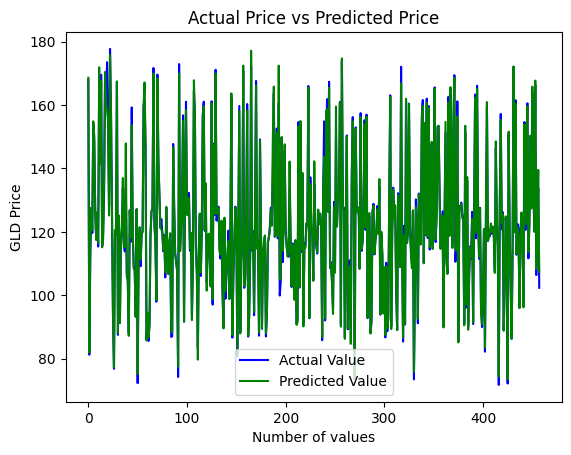

In [30]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()